# Introduction to Data Science 2025

# Week 3

## Exercise 1 | Working with geospatial data (GIS)

To get at least a bit familiar with [GIS](https://en.wikipedia.org/wiki/Geographic_information_system) data and the concept of map projections, we’ll do a simple task of plotting two data sets that are given in different coordinate systems.

1. Download the [world_m.zip](https://github.com/HY-TKTL/intro-to-data-science-2017/blob/master/world_m.zip) and [cities.zip](https://github.com/HY-TKTL/intro-to-data-science-2017/blob/master/cities.zip) files that each include a set of GIS files. Most notably, the <span style="font-weight: bold">shp</span> files are [Shapefile-files](https://en.wikipedia.org/wiki/Shapefile) with coordinates (don’t look, it’s binary!). The <span style="font-weight: bold">prj</span> files contain information (in plain text, so okay to look) about the coordinate systems. Open the files using your favorite programming environment and packages.  

    <span style="font-weight: 500"> *Hint: We warmly recommend [Geopandas](http://geopandas.org/) for pythonistas.*</span>

In [80]:
# Use this cell for your code
import geopandas as gpd, matplotlib.pyplot as plt
world = gpd.read_file("world_m/world_m.shp")
cities = gpd.read_file("cities/cities.shp")

2. The <span style="font-weight: bold">world_m</span> file contains borders of almost all countries in the world. Plot the world.

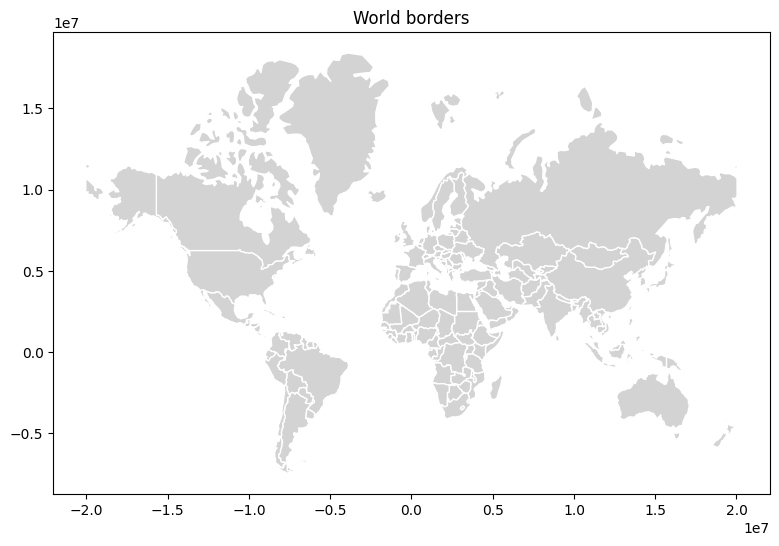

In [81]:
# Use this cell for your code
import matplotlib.pyplot as plt
ax = world.plot(figsize=(12,6), color='lightgrey', edgecolor='white')
plt.title("World borders")
plt.show()

3. On top of the countries that you just plotted, plot another layer of information, namely the capital cities of each country from the <span style="font-weight: bold">cities</span> dataset. However, depending on how clever your programming environment is, the cities will probably all appear to be in the Gulf of Guinea, near the coordinates (0°, 0°).

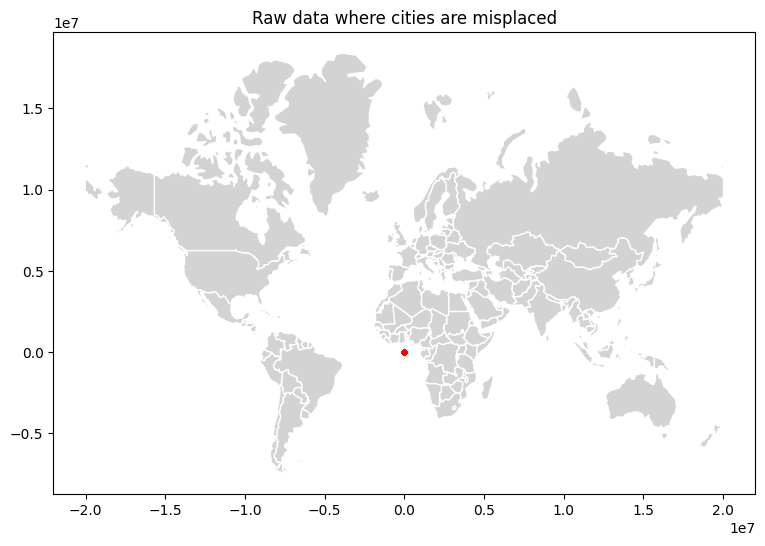

In [82]:
# Use this cell for your code
ax = world.plot(figsize=(12,6), color='lightgrey', edgecolor='white')
cities.plot(ax=ax, color='red', markersize=8)
plt.title("Raw data where cities are misplaced")
plt.show()

4. Perform a map projection to bring the two data-sets into a shared coordinate system. (You can choose which one.) Now plot the two layers together to make sure the capital cities are where they are supposed to be.

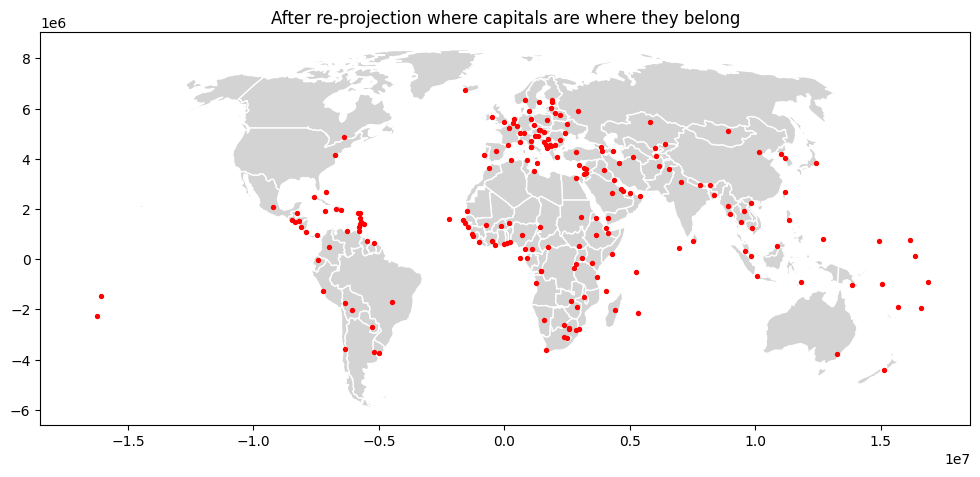

In [83]:
# Use this cell for your code
target_crs = 'ESRI:54030'  # Robinson
world_rob = world.to_crs(target_crs)
cities_rob = cities.to_crs(target_crs)
ax = world_rob.plot(figsize=(12,6), color='lightgrey', edgecolor='white')
cities_rob.plot(ax=ax, color='red', markersize=8)
plt.title("After re-projection where capitals are where they belong")
plt.show()

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Symbol classification

We’ll be looking into machine learning by checking out the [HASYv2](https://zenodo.org/record/259444#.Wb7efZ8xDhZ) dataset that contains hand written mathematical symbols as images. The whole dataset is quite big, so we’ll restrict ourselves to doing 10-class classification on some of the symbols. Download the data and complete the following tasks.

1. Extract the data and find inside a file called <span style="font-weight: bold">hasy-data-labels.csv</span>. This file contains the labels for each of the images in the <span style="font-weight: bold">hasy_data</span> folder. Read the labels in and only keep the rows where the <span style="font-weight: bold">symbol_id</span> is within the inclusive range <span style="font-weight: bold">[70, 79]</span>. Read the corresponding images as black-and-white images and flatten them so that each image is a single vector of shape <span style="font-weight: bold">32x32 = 1024</span>. Your dataset should now consist of your input data of shape <span style="font-weight: bold">(1020, 1024)</span> and your labels of shape <span style="font-weight: bold">(1020, )</span>. That is, a matrix of shape <span style="font-weight: bold">1020 x 1024</span> and a vector of size <span style="font-weight: bold">1020</span>.

In [84]:
# Use this cell for your code
import pandas as pd, numpy as np, matplotlib.pyplot as plt
labels = pd.read_csv("HASYv2/hasy-data-labels.csv")
mask  = (labels.symbol_id >= 70) & (labels.symbol_id <= 79)
sub   = labels[mask].reset_index(drop=True)

X, y = [], []
for _, row in sub.iterrows():
    img  = plt.imread("HASYv2/" + row['path'])   
    grey = img.mean(axis=2)                      
    X.append(grey.ravel())                       
    y.append(row['symbol_id'])

X, y = np.array(X), np.array(y)

2. Randomly shuffle the data, and then split it into training and test sets, using the first 80% of the data for training and the rest for evaluation.

In [134]:
# Use this cell for your code
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


3. Fit a logistic regression classifier on the data. Note that we have a multi-class classification problem, but logistic regression is a binary classifier. For this reason, you will find useful <span style="font-weight: bold">[Sklearn's "multi_class" attribute](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)</span>. Use a multinomial loss and the softmax function to predict the probability of each class as the outcome.  The classifier should select the class with the highest probability. Most library implementations will do this for you - feel free to use one.

In [135]:
# Use this cell for your 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)

c:\Users\proes\Downloads\week3datascience\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


4. In order to evaluate the model, let’s create our own dummy classifier that simply guesses the most common class in the training set (looking at the test set here would be cheating!). Then, evaluate your logistic regression model on the test data, and compare it to the majority class classifier. The logistic regression model should have significantly better accuracy as the dummy model is merely making a guess.

    <span style="font-weight: 500"> *Hint: Sklearn's DummyClassifier( ) might save you a bit of time.*</span>

In [136]:
# Use this cell for your code
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
acc_log = accuracy_score(y_test, logreg.predict(X_test))
acc_dum = accuracy_score(y_test, dummy.predict(X_test))
print(acc_log)
print(acc_dum)

0.8823529411764706
0.12745098039215685


5. Plot some of the images that the logistic classifier misclassified. Can you think of an explanation why they were misclassified? Would you have gotten them right?
    
    <span style="font-weight: 500">*Hint: Matplotlib has a [function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) that can help you with plotting.*</span>

Here are some examples of the syntax used to fit a logistic regression classifier (using Sklearn or statsmodel with Python, or GLM with R):

In [137]:
#Sklearn (python)

# from sklearn.linear_model import LogisticRegression

# Fit on the training data set, with:
# X : {array-like, sparse matrix}, shape (n_samples, n_features) , n_samples rows x n_features columns
# with attributes that describe each sample.
# y : array-like, shape (n_samples,) , n_samples target values for each sample.

# model = LogisticRegression()
# model.fit(X, y)

In [138]:
# Statsmodels (python)

# import statsmodels.api as sm
# model = sm.Logit(y, X)

In [139]:
# GLM (R)

# model <- glm(y ~.,family=binomial(link='logit'), data=X)

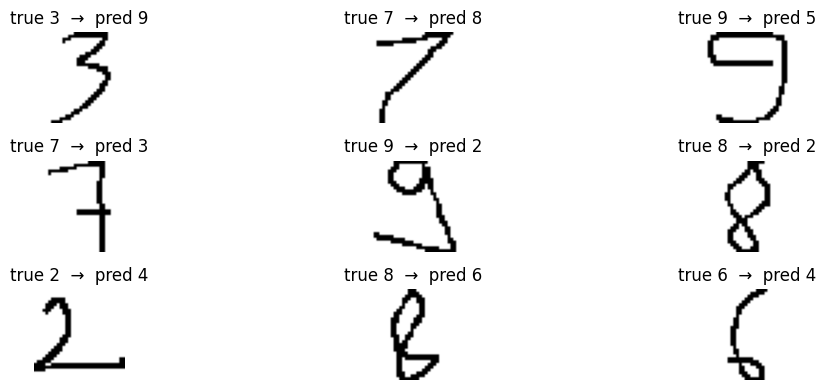

In [142]:
# Use this cell for your code
y_pred = logreg.predict(X_test)
mis = np.where(y_pred != y_test)[0]

plt.figure(figsize=(12, 4))
for k, i in enumerate(mis[:9]):
    plt.subplot(3, 3, k+1)
    plt.imshow(X_test[i].reshape(32, 32), cmap='gray')
    plt.title(f"true {str(y_test[i])[1]}  →  pred {str(y_pred[i])[1]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

I think the reason the modek got them wrong is because they look similar, also the writing style of people is different, while some people write 7 similar to 3 others write it more similar ot one, without the middle slash, but a human would have gotten them write the model did not

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**